In [11]:
'''5. Usando as bibliotecas Pandas e MatPlotLib e um dataset (podes selecionar das aulas, fazer 
download na plataforma kaggle ou escolher um dataset pessoal), elabora um notebook 
jupyter no qual efetues: 
•1_3 Limpeza e tratamento de dados; 
'''




'5. Usando as bibliotecas Pandas e MatPlotLib e um dataset (podes selecionar das aulas, fazer \ndownload na plataforma kaggle ou escolher um dataset pessoal), elabora um notebook \njupyter no qual efetues: \n•1_3 Limpeza e tratamento de dados; \n'

In [1]:

import pandas as pd
import pylab as plt
import matplotlib.pyplot as plt


In [2]:
#carrega o CSV e transforma-o num DataFrame do pandas, que é mais fácil de manipular e analisar.
df_train = pd.read_csv("netflix1.csv")

#Imprime as 5 primeiras linhas
print(df_train.head())
#Imprime as 5 últimas linhas
print(df_train.tail())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [3]:
#Vê o tipo de dados de cada coluna
print(df_train.dtypes)

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object


In [4]:
# O tipo 'object' é uma string para pandas que apresenta problemas com algoritmos de aprendizado de máquina
# Se quisermos usá-los como recursos, precisaremos convertê-los em representações numéricas.
#Obtenha algumas informações básicas sobre o DataFrame:

print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None


In [5]:

#Agora vamos gerar várias estatísticas descritivas no DataFrame:

print(df_train.describe())

       release_year
count   8790.000000
mean    2014.183163
std        8.825466
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [6]:

##Lista as colunas e marca as que possuem algum valor nulo
print(df_train.isnull().any())
print()

show_id         False
type            False
title           False
director        False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
dtype: bool



In [ ]:
# vamos simplesmente remover a coluna de nossos dados.
#Obs. essa á a opção apenas para exercitar as possibilidades de forma didática.
# Vários algoritmos podem beneficiar da informação da cabine, mesmo com poucos exemplos.
## Cria um novo dataframe (df_train2) sem a coluna date_added
df_train2 = df_train.drop("date_added", axis=1)
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   release_year  8790 non-null   int64 
 6   rating        8790 non-null   object
 7   duration      8790 non-null   object
 8   listed_in     8790 non-null   object
dtypes: int64(1), object(8)
memory usage: 618.2+ KB


2014.183162684869
2017.0


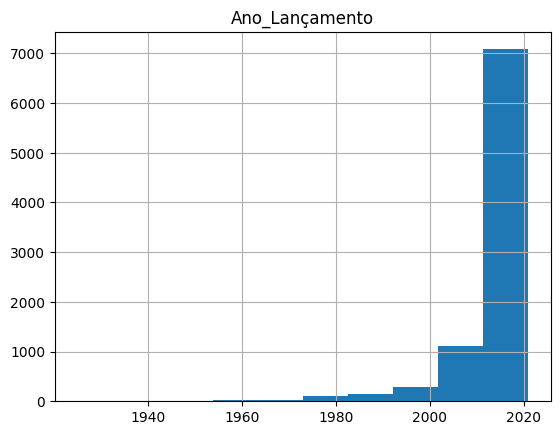

In [8]:
#Agora vamos analisar a coluna release_year.

#Ver a média e a mediana
# e ver o histograma dos dados originais.

media_idade = df_train["release_year"].mean()
mediana_idade = df_train["release_year"].median()

print(media_idade)
print(mediana_idade)

df_train["release_year"].hist()
plt.title("Ano_Lançamento")
plt.show()

In [9]:

# Vamos analisar a coluna country
print(df_train2[df_train2["country"] == "United States"].groupby("country")["country"].count()) 
#Numero de filmes originários dos Estados Unidos

country
United States    3240
Name: country, dtype: int64


In [10]:
#Forma de salvar os dados

df_train2.to_csv("netflix1_no_nulls.csv", index=False)